In [1]:
import pickle
from pathlib import Path

import pandas as pd
import numpy as np
from pulearn.elkanoto import ElkanotoPuClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.decomposition import PCA

from tqdm import tqdm
import pul_config
import importlib

importlib.reload(pul_config)

import utils

importlib.reload(utils)
from utils import (
    calc_predictions,
    build_proba_df,
    build_ranked_lists,
    calc_scores,
    load_grid_searches,
    score_df_from_grid_searches,
    train,
    evaluate,
)

# CHANGE HERE
input_dirs = [
    Path("1_outputs/standard/"),
    Path("1_outputs/small_DS/"),
    Path("1_outputs/large/"),
    Path("1_outputs/large_small_DS/"),
]
output_dirs = [
    Path("2_outputs/standard/"),
    Path("2_outputs/small_DS/"),
    Path("2_outputs/large/"),
    Path("2_outputs/large_small_DS/"),
]
method = "LocalOutlierFactor"
pul_cfg = pul_config.LocalOutlierFactorConfig


remote_method = "LocalOutlierFactor"  # name of the output in S3
# -----

local_method = method
MODEL_NAMES = ("RotatE", "TransE", "CompGCN")
output_dirs = [output_dir / method for output_dir in output_dirs]

## Training

In [2]:
N_JOBS = 20
CV = 5
rerun = False

for input_dir, output_dir in tqdm(zip(input_dirs, output_dirs), total=len(input_dirs)):
    train(
        input_dir=input_dir,
        output_dir=output_dir,
        model_names=MODEL_NAMES,
        cv=CV,
        n_jobs=N_JOBS,
        pul_cfg=pul_cfg,
        rerun=rerun,
    )

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

 20%|██        | 2/10 [00:00<00:00,  9.28it/s]

2_outputs/standard/LocalOutlierFactor/RotatE/RotatE_0.pkl exists. Skipping...
2_outputs/standard/LocalOutlierFactor/RotatE/RotatE_1.pkl exists. Skipping...




 30%|███       | 3/10 [00:00<00:01,  5.05it/s]

 40%|████      | 4/10 [00:00<00:01,  5.67it/s]

2_outputs/standard/LocalOutlierFactor/RotatE/RotatE_2.pkl exists. Skipping...
2_outputs/standard/LocalOutlierFactor/RotatE/RotatE_3.pkl exists. Skipping...




 60%|██████    | 6/10 [00:00<00:00,  7.96it/s]

2_outputs/standard/LocalOutlierFactor/RotatE/RotatE_4.pkl exists. Skipping...
2_outputs/standard/LocalOutlierFactor/RotatE/RotatE_5.pkl exists. Skipping...




 70%|███████   | 7/10 [00:01<00:00,  6.37it/s]

 80%|████████  | 8/10 [00:01<00:00,  6.32it/s]

2_outputs/standard/LocalOutlierFactor/RotatE/RotatE_6.pkl exists. Skipping...
2_outputs/standard/LocalOutlierFactor/RotatE/RotatE_7.pkl exists. Skipping...




100%|██████████| 10/10 [00:01<00:00,  6.99it/s]

 33%|███▎      | 1/3 [00:01<00:02,  1.47s/it]

2_outputs/standard/LocalOutlierFactor/RotatE/RotatE_8.pkl exists. Skipping...
2_outputs/standard/LocalOutlierFactor/RotatE/RotatE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:02,  3.94it/s]

 20%|██        | 2/10 [00:00<00:01,  5.83it/s]

2_outputs/standard/LocalOutlierFactor/TransE/TransE_0.pkl exists. Skipping...
2_outputs/standard/LocalOutlierFactor/TransE/TransE_1.pkl exists. Skipping...




 30%|███       | 3/10 [00:00<00:01,  5.86it/s]

 50%|█████     | 5/10 [00:00<00:00,  9.10it/s]

2_outputs/standard/LocalOutlierFactor/TransE/TransE_2.pkl exists. Skipping...
2_outputs/standard/LocalOutlierFactor/TransE/TransE_3.pkl exists. Skipping...
2_outputs/standard/LocalOutlierFactor/TransE/TransE_4.pkl exists. Skipping...
2_outputs/standard/LocalOutlierFactor/TransE/TransE_5.pkl exists. Skipping...




 70%|███████   | 7/10 [00:01<00:00,  6.55it/s]

2_outputs/standard/LocalOutlierFactor/TransE/TransE_6.pkl exists. Skipping...




 80%|████████  | 8/10 [00:01<00:00,  6.53it/s]

2_outputs/standard/LocalOutlierFactor/TransE/TransE_7.pkl exists. Skipping...




 90%|█████████ | 9/10 [00:01<00:00,  6.06it/s]

2_outputs/standard/LocalOutlierFactor/TransE/TransE_8.pkl exists. Skipping...




100%|██████████| 10/10 [00:01<00:00,  6.28it/s]

 67%|██████▋   | 2/3 [00:03<00:01,  1.55s/it]

2_outputs/standard/LocalOutlierFactor/TransE/TransE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:01,  8.24it/s]

2_outputs/standard/LocalOutlierFactor/CompGCN/CompGCN_0.pkl exists. Skipping...




 20%|██        | 2/10 [00:00<00:02,  3.78it/s]

2_outputs/standard/LocalOutlierFactor/CompGCN/CompGCN_1.pkl exists. Skipping...




 30%|███       | 3/10 [00:00<00:01,  3.74it/s]

2_outputs/standard/LocalOutlierFactor/CompGCN/CompGCN_2.pkl exists. Skipping...




 40%|████      | 4/10 [00:01<00:02,  2.29it/s]

2_outputs/standard/LocalOutlierFactor/CompGCN/CompGCN_3.pkl exists. Skipping...




 50%|█████     | 5/10 [00:01<00:01,  2.72it/s]

 60%|██████    | 6/10 [00:01<00:01,  3.36it/s]

2_outputs/standard/LocalOutlierFactor/CompGCN/CompGCN_4.pkl exists. Skipping...
2_outputs/standard/LocalOutlierFactor/CompGCN/CompGCN_5.pkl exists. Skipping...




 70%|███████   | 7/10 [00:02<00:00,  3.70it/s]

2_outputs/standard/LocalOutlierFactor/CompGCN/CompGCN_6.pkl exists. Skipping...




 80%|████████  | 8/10 [00:02<00:00,  3.40it/s]

2_outputs/standard/LocalOutlierFactor/CompGCN/CompGCN_7.pkl exists. Skipping...




 90%|█████████ | 9/10 [00:02<00:00,  3.41it/s]

100%|██████████| 10/10 [00:02<00:00,  3.44it/s]

100%|██████████| 3/3 [00:06<00:00,  2.18s/it]

2_outputs/standard/LocalOutlierFactor/CompGCN/CompGCN_8.pkl exists. Skipping...
2_outputs/standard/LocalOutlierFactor/CompGCN/CompGCN_9.pkl exists. Skipping...


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

 20%|██        | 2/10 [00:00<00:00, 10.54it/s]

2_outputs/small_DS/LocalOutlierFactor/RotatE/RotatE_0.pkl exists. Skipping...
2_outputs/small_DS/LocalOutlierFactor/RotatE/RotatE_1.pkl exists. Skipping...
2_outputs/small_DS/LocalOutlierFactor/RotatE/RotatE_2.pkl exists. Skipping...




 40%|████      | 4/10 [00:00<00:00, 11.06it/s]

2_outputs/small_DS/LocalOutlierFactor/RotatE/RotatE_3.pkl exists. Skipping...
2_outputs/small_DS/LocalOutlierFactor/RotatE/RotatE_4.pkl exists. Skipping...




 60%|██████    | 6/10 [00:00<00:00,  9.80it/s]

2_outputs/small_DS/LocalOutlierFactor/RotatE/RotatE_5.pkl exists. Skipping...




 70%|███████   | 7/10 [00:00<00:00,  9.80it/s]

2_outputs/small_DS/LocalOutlierFactor/RotatE/RotatE_6.pkl exists. Skipping...
2_outputs/small_DS/LocalOutlierFactor/RotatE/RotatE_7.pkl exists. Skipping...




100%|██████████| 10/10 [00:00<00:00, 11.17it/s][A

 33%|███▎      | 1/3 [00:00<00:01,  1.06it/s]

2_outputs/small_DS/LocalOutlierFactor/RotatE/RotatE_8.pkl exists. Skipping...
2_outputs/small_DS/LocalOutlierFactor/RotatE/RotatE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:01,  8.47it/s]

2_outputs/small_DS/LocalOutlierFactor/TransE/TransE_0.pkl exists. Skipping...




 20%|██        | 2/10 [00:00<00:00,  8.92it/s]

2_outputs/small_DS/LocalOutlierFactor/TransE/TransE_1.pkl exists. Skipping...




 30%|███       | 3/10 [00:00<00:01,  6.49it/s]

 50%|█████     | 5/10 [00:00<00:00,  8.36it/s]

2_outputs/small_DS/LocalOutlierFactor/TransE/TransE_2.pkl exists. Skipping...
2_outputs/small_DS/LocalOutlierFactor/TransE/TransE_3.pkl exists. Skipping...
2_outputs/small_DS/LocalOutlierFactor/TransE/TransE_4.pkl exists. Skipping...




 60%|██████    | 6/10 [00:00<00:00,  6.52it/s]

 70%|███████   | 7/10 [00:00<00:00,  7.01it/s]

2_outputs/small_DS/LocalOutlierFactor/TransE/TransE_5.pkl exists. Skipping...
2_outputs/small_DS/LocalOutlierFactor/TransE/TransE_6.pkl exists. Skipping...
2_outputs/small_DS/LocalOutlierFactor/TransE/TransE_7.pkl exists. Skipping...




 90%|█████████ | 9/10 [00:01<00:00,  5.40it/s]

100%|██████████| 10/10 [00:01<00:00,  6.35it/s]

 67%|██████▋   | 2/3 [00:02<00:01,  1.32s/it]

2_outputs/small_DS/LocalOutlierFactor/TransE/TransE_8.pkl exists. Skipping...
2_outputs/small_DS/LocalOutlierFactor/TransE/TransE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:01,  6.04it/s]

2_outputs/small_DS/LocalOutlierFactor/CompGCN/CompGCN_0.pkl exists. Skipping...




 20%|██        | 2/10 [00:00<00:02,  3.60it/s]

2_outputs/small_DS/LocalOutlierFactor/CompGCN/CompGCN_1.pkl exists. Skipping...




 30%|███       | 3/10 [00:01<00:02,  2.70it/s]

2_outputs/small_DS/LocalOutlierFactor/CompGCN/CompGCN_2.pkl exists. Skipping...




 40%|████      | 4/10 [00:01<00:01,  3.19it/s]

 50%|█████     | 5/10 [00:01<00:01,  3.86it/s]

2_outputs/small_DS/LocalOutlierFactor/CompGCN/CompGCN_3.pkl exists. Skipping...
2_outputs/small_DS/LocalOutlierFactor/CompGCN/CompGCN_4.pkl exists. Skipping...




 60%|██████    | 6/10 [00:01<00:00,  4.68it/s]

 70%|███████   | 7/10 [00:01<00:00,  5.36it/s]

2_outputs/small_DS/LocalOutlierFactor/CompGCN/CompGCN_5.pkl exists. Skipping...
2_outputs/small_DS/LocalOutlierFactor/CompGCN/CompGCN_6.pkl exists. Skipping...




 80%|████████  | 8/10 [00:01<00:00,  5.78it/s]

100%|██████████| 10/10 [00:01<00:00,  5.03it/s]

 50%|█████     | 2/4 [00:10<00:10,  5.33s/it]

2_outputs/small_DS/LocalOutlierFactor/CompGCN/CompGCN_7.pkl exists. Skipping...
2_outputs/small_DS/LocalOutlierFactor/CompGCN/CompGCN_8.pkl exists. Skipping...
2_outputs/small_DS/LocalOutlierFactor/CompGCN/CompGCN_9.pkl exists. Skipping...



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:02,  4.27it/s]

2_outputs/large/LocalOutlierFactor/RotatE/RotatE_0.pkl exists. Skipping...




 20%|██        | 2/10 [00:00<00:02,  3.28it/s]

 30%|███       | 3/10 [00:00<00:01,  4.02it/s]

2_outputs/large/LocalOutlierFactor/RotatE/RotatE_1.pkl exists. Skipping...
2_outputs/large/LocalOutlierFactor/RotatE/RotatE_2.pkl exists. Skipping...




 40%|████      | 4/10 [00:00<00:01,  4.28it/s]

 50%|█████     | 5/10 [00:01<00:01,  4.61it/s]

2_outputs/large/LocalOutlierFactor/RotatE/RotatE_3.pkl exists. Skipping...
2_outputs/large/LocalOutlierFactor/RotatE/RotatE_4.pkl exists. Skipping...




 70%|███████   | 7/10 [00:01<00:00,  7.23it/s]

2_outputs/large/LocalOutlierFactor/RotatE/RotatE_5.pkl exists. Skipping...
2_outputs/large/LocalOutlierFactor/RotatE/RotatE_6.pkl exists. Skipping...




 80%|████████  | 8/10 [00:01<00:00,  6.34it/s]

 90%|█████████ | 9/10 [00:01<00:00,  6.44it/s]

2_outputs/large/LocalOutlierFactor/RotatE/RotatE_7.pkl exists. Skipping...
2_outputs/large/LocalOutlierFactor/RotatE/RotatE_8.pkl exists. Skipping...




100%|██████████| 10/10 [00:01<00:00,  5.55it/s]

 33%|███▎      | 1/3 [00:01<00:03,  1.93s/it]

2_outputs/large/LocalOutlierFactor/RotatE/RotatE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:03<00:31,  3.46s/it]

2_outputs/large/LocalOutlierFactor/TransE/TransE_0.pkl exists. Skipping...




 20%|██        | 2/10 [00:04<00:16,  2.12s/it]

2_outputs/large/LocalOutlierFactor/TransE/TransE_1.pkl exists. Skipping...




 30%|███       | 3/10 [00:04<00:09,  1.29s/it]

 40%|████      | 4/10 [00:05<00:05,  1.17it/s]

2_outputs/large/LocalOutlierFactor/TransE/TransE_2.pkl exists. Skipping...
2_outputs/large/LocalOutlierFactor/TransE/TransE_3.pkl exists. Skipping...




 60%|██████    | 6/10 [00:05<00:01,  2.11it/s]

2_outputs/large/LocalOutlierFactor/TransE/TransE_4.pkl exists. Skipping...
2_outputs/large/LocalOutlierFactor/TransE/TransE_5.pkl exists. Skipping...




 70%|███████   | 7/10 [00:05<00:01,  2.06it/s]

2_outputs/large/LocalOutlierFactor/TransE/TransE_6.pkl exists. Skipping...




 80%|████████  | 8/10 [00:06<00:00,  2.38it/s]

 90%|█████████ | 9/10 [00:06<00:00,  2.84it/s]

2_outputs/large/LocalOutlierFactor/TransE/TransE_7.pkl exists. Skipping...
2_outputs/large/LocalOutlierFactor/TransE/TransE_8.pkl exists. Skipping...




100%|██████████| 10/10 [00:06<00:00,  1.50it/s]

 67%|██████▋   | 2/3 [00:08<00:04,  4.73s/it]

2_outputs/large/LocalOutlierFactor/TransE/TransE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:02,  3.83it/s]

2_outputs/large/LocalOutlierFactor/CompGCN/CompGCN_0.pkl exists. Skipping...




 20%|██        | 2/10 [00:00<00:02,  3.54it/s]

2_outputs/large/LocalOutlierFactor/CompGCN/CompGCN_1.pkl exists. Skipping...




 30%|███       | 3/10 [00:00<00:02,  2.97it/s]

2_outputs/large/LocalOutlierFactor/CompGCN/CompGCN_2.pkl exists. Skipping...




 40%|████      | 4/10 [00:01<00:01,  3.17it/s]

2_outputs/large/LocalOutlierFactor/CompGCN/CompGCN_3.pkl exists. Skipping...




 50%|█████     | 5/10 [00:01<00:01,  3.37it/s]

2_outputs/large/LocalOutlierFactor/CompGCN/CompGCN_4.pkl exists. Skipping...




 60%|██████    | 6/10 [00:02<00:02,  1.75it/s]

2_outputs/large/LocalOutlierFactor/CompGCN/CompGCN_5.pkl exists. Skipping...




 70%|███████   | 7/10 [00:03<00:01,  1.73it/s]

2_outputs/large/LocalOutlierFactor/CompGCN/CompGCN_6.pkl exists. Skipping...




 80%|████████  | 8/10 [00:03<00:00,  2.13it/s]

 90%|█████████ | 9/10 [00:03<00:00,  2.74it/s]

2_outputs/large/LocalOutlierFactor/CompGCN/CompGCN_7.pkl exists. Skipping...
2_outputs/large/LocalOutlierFactor/CompGCN/CompGCN_8.pkl exists. Skipping...




100%|██████████| 10/10 [00:03<00:00,  2.59it/s]

 75%|███████▌  | 3/4 [00:23<00:08,  8.69s/it]

2_outputs/large/LocalOutlierFactor/CompGCN/CompGCN_9.pkl exists. Skipping...



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:01,  7.34it/s]

 30%|███       | 3/10 [00:00<00:00, 11.57it/s]

2_outputs/large_small_DS/LocalOutlierFactor/RotatE/RotatE_0.pkl exists. Skipping...
2_outputs/large_small_DS/LocalOutlierFactor/RotatE/RotatE_1.pkl exists. Skipping...
2_outputs/large_small_DS/LocalOutlierFactor/RotatE/RotatE_2.pkl exists. Skipping...




 50%|█████     | 5/10 [00:00<00:00, 11.76it/s]

2_outputs/large_small_DS/LocalOutlierFactor/RotatE/RotatE_3.pkl exists. Skipping...
2_outputs/large_small_DS/LocalOutlierFactor/RotatE/RotatE_4.pkl exists. Skipping...
2_outputs/large_small_DS/LocalOutlierFactor/RotatE/RotatE_5.pkl exists. Skipping...




 70%|███████   | 7/10 [00:00<00:00, 10.69it/s]

2_outputs/large_small_DS/LocalOutlierFactor/RotatE/RotatE_6.pkl exists. Skipping...
2_outputs/large_small_DS/LocalOutlierFactor/RotatE/RotatE_7.pkl exists. Skipping...




100%|██████████| 10/10 [00:00<00:00, 10.27it/s][A

 33%|███▎      | 1/3 [00:01<00:02,  1.04s/it]

2_outputs/large_small_DS/LocalOutlierFactor/RotatE/RotatE_8.pkl exists. Skipping...
2_outputs/large_small_DS/LocalOutlierFactor/RotatE/RotatE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:01,  4.77it/s]

 20%|██        | 2/10 [00:00<00:01,  6.46it/s]

2_outputs/large_small_DS/LocalOutlierFactor/TransE/TransE_0.pkl exists. Skipping...
2_outputs/large_small_DS/LocalOutlierFactor/TransE/TransE_1.pkl exists. Skipping...




 30%|███       | 3/10 [00:00<00:01,  6.95it/s]

2_outputs/large_small_DS/LocalOutlierFactor/TransE/TransE_2.pkl exists. Skipping...
2_outputs/large_small_DS/LocalOutlierFactor/TransE/TransE_3.pkl exists. Skipping...




 50%|█████     | 5/10 [00:00<00:00,  6.19it/s]

 60%|██████    | 6/10 [00:00<00:00,  6.38it/s]

2_outputs/large_small_DS/LocalOutlierFactor/TransE/TransE_4.pkl exists. Skipping...
2_outputs/large_small_DS/LocalOutlierFactor/TransE/TransE_5.pkl exists. Skipping...




 70%|███████   | 7/10 [00:01<00:00,  6.76it/s]

 80%|████████  | 8/10 [00:01<00:00,  6.93it/s]

2_outputs/large_small_DS/LocalOutlierFactor/TransE/TransE_6.pkl exists. Skipping...
2_outputs/large_small_DS/LocalOutlierFactor/TransE/TransE_7.pkl exists. Skipping...




 90%|█████████ | 9/10 [00:01<00:00,  5.62it/s]

100%|██████████| 10/10 [00:01<00:00,  6.10it/s]

 67%|██████▋   | 2/3 [00:02<00:01,  1.41s/it]

2_outputs/large_small_DS/LocalOutlierFactor/TransE/TransE_8.pkl exists. Skipping...
2_outputs/large_small_DS/LocalOutlierFactor/TransE/TransE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:02,  4.33it/s]

2_outputs/large_small_DS/LocalOutlierFactor/CompGCN/CompGCN_0.pkl exists. Skipping...




 20%|██        | 2/10 [00:00<00:01,  4.12it/s]

2_outputs/large_small_DS/LocalOutlierFactor/CompGCN/CompGCN_1.pkl exists. Skipping...




 30%|███       | 3/10 [00:00<00:01,  4.45it/s]

 40%|████      | 4/10 [00:00<00:01,  5.48it/s]

2_outputs/large_small_DS/LocalOutlierFactor/CompGCN/CompGCN_2.pkl exists. Skipping...
2_outputs/large_small_DS/LocalOutlierFactor/CompGCN/CompGCN_3.pkl exists. Skipping...




 50%|█████     | 5/10 [00:00<00:00,  6.44it/s]

2_outputs/large_small_DS/LocalOutlierFactor/CompGCN/CompGCN_4.pkl exists. Skipping...
2_outputs/large_small_DS/LocalOutlierFactor/CompGCN/CompGCN_5.pkl exists. Skipping...




 70%|███████   | 7/10 [00:01<00:00,  7.29it/s]

2_outputs/large_small_DS/LocalOutlierFactor/CompGCN/CompGCN_6.pkl exists. Skipping...




 80%|████████  | 8/10 [00:01<00:00,  5.92it/s]

 90%|█████████ | 9/10 [00:01<00:00,  6.67it/s]

2_outputs/large_small_DS/LocalOutlierFactor/CompGCN/CompGCN_7.pkl exists. Skipping...
2_outputs/large_small_DS/LocalOutlierFactor/CompGCN/CompGCN_8.pkl exists. Skipping...




100%|██████████| 10/10 [00:01<00:00,  6.10it/s]

100%|██████████| 4/4 [00:28<00:00,  7.03s/it]

2_outputs/large_small_DS/LocalOutlierFactor/CompGCN/CompGCN_9.pkl exists. Skipping...


## Evaluation

In [6]:
grid_searches_list = [
    load_grid_searches(output_dir=o, model_names=MODEL_NAMES) for o in output_dirs
]

In [7]:
score_dfs = [
    score_df_from_grid_searches(gs, i) for gs, i in zip(grid_searches_list, input_dirs)
]
for output_dir, score_df in zip(output_dirs, score_dfs):
    score_df.to_csv(output_dir / "score_df.csv")

In [8]:
score_dfs[0].groupby("model_name").mean()

/tmp/ipykernel_3533371/1470429527.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_dfs[0].groupby('model_name').mean()


,score10_val,score100_val,score10_test,score100_test,score10_all,score100_all,mr_all,mrr_all,amri_all,mr_test,mrr_test,amri_test,tp_test,fp_test,fn_test,tn_test,tp_all,fp_all,fn_all,tn_all
model_name,,,,,,,,,,,,,,,,,,,,
CompGCN,0.5,3.6,0.1,2.3,0.9,6.4,8108.477544,0.001208,0.153001,1981.7880,0.001476,-0.038421,2588.6,1102.4,90.4,34.6,12539.6,5986.4,323.0,296.0
RotatE,0.9,3.9,0.9,4.2,0.8,6.7,11584.699515,0.000898,-0.210165,2206.9328,0.004020,-0.156452,2619.6,1071.4,96.7,28.3,11574.1,6951.9,436.5,182.5
TransE,0.7,3.3,0.4,3.7,1.4,8.8,11137.486753,0.001213,-0.163444,2219.2112,0.002070,-0.162889,2569.4,1121.6,94.9,30.1,11179.3,7346.7,409.0,210.0


Text(0, 0.5, 'score')

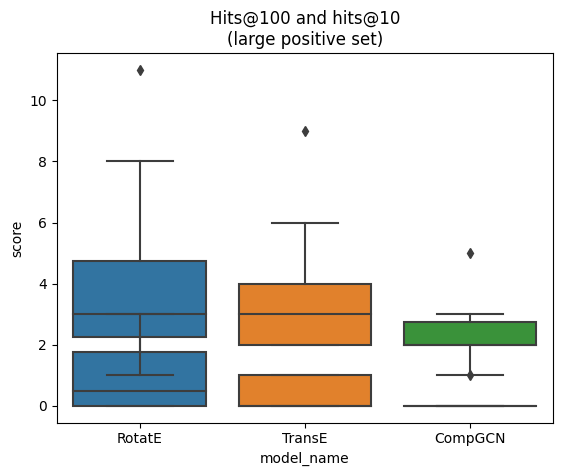

In [9]:
import seaborn as sns

sns.boxplot(score_dfs[0], x="model_name", y="score10_test").set(
    title="Hits@100 and hits@10\n(large positive set)"
)
sns.boxplot(score_dfs[0], x="model_name", y="score100_test").set_ylabel("score")

Text(0, 0.5, 'score')

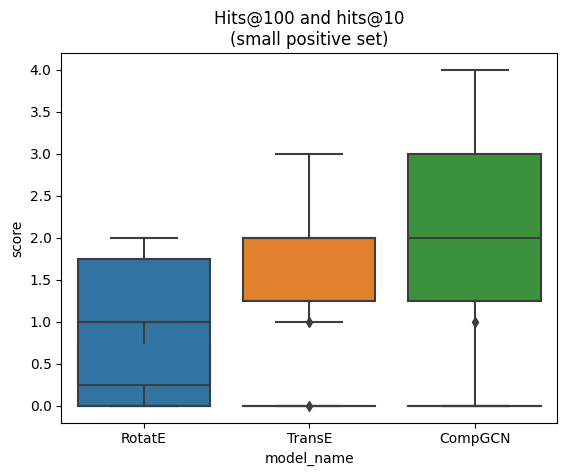

In [10]:
import seaborn as sns

sns.boxplot(score_dfs[1], x="model_name", y="score10_test").set(
    title="Hits@100 and hits@10\n(small positive set)"
)
sns.boxplot(score_dfs[1], x="model_name", y="score100_test").set_ylabel("score")

Text(0, 0.5, 'score')

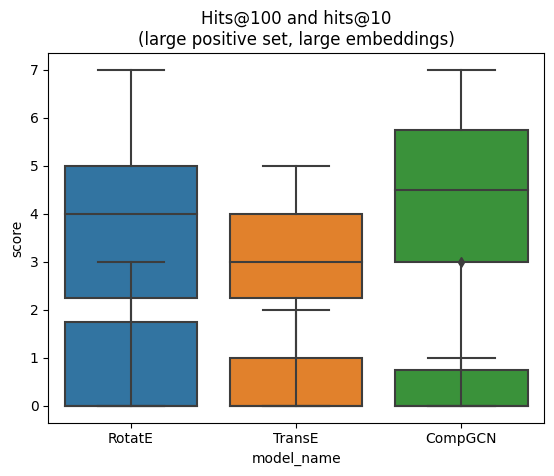

In [11]:
import seaborn as sns

sns.boxplot(score_dfs[2], x="model_name", y="score10_test").set(
    title="Hits@100 and hits@10\n(large positive set, large embeddings)"
)
sns.boxplot(score_dfs[2], x="model_name", y="score100_test").set_ylabel("score")

Text(0, 0.5, 'score')

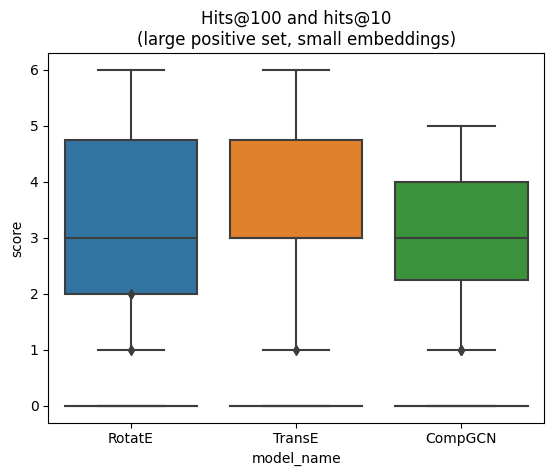

In [12]:
import seaborn as sns

sns.boxplot(score_dfs[3], x="model_name", y="score10_test").set(
    title="Hits@100 and hits@10\n(large positive set, small embeddings)"
)
sns.boxplot(score_dfs[3], x="model_name", y="score100_test").set_ylabel("score")

In [13]:
score_dfs = []
for output_dir in output_dirs:
    score_dfs.append(pd.read_csv(output_dir / "score_df.csv", index_col=0))
plot_dfs = []
for ds, score_df in zip(
    ("large", "small", "large_embeddings", "large_embeddings_small"), score_dfs
):
    plot_df = score_df[["model_name", "score10_test", "score100_test"]].copy()
    plot_df.columns = ["model_name", "hits@10", "hits@100"]
    plot_df["dataset"] = ds
    plot_dfs.append(plot_df)

plot_df = pd.concat(plot_dfs)
plot_df = plot_df.melt(id_vars=["model_name", "dataset"])
plot_dfs = {k: v for k, v in plot_df.groupby("model_name")}

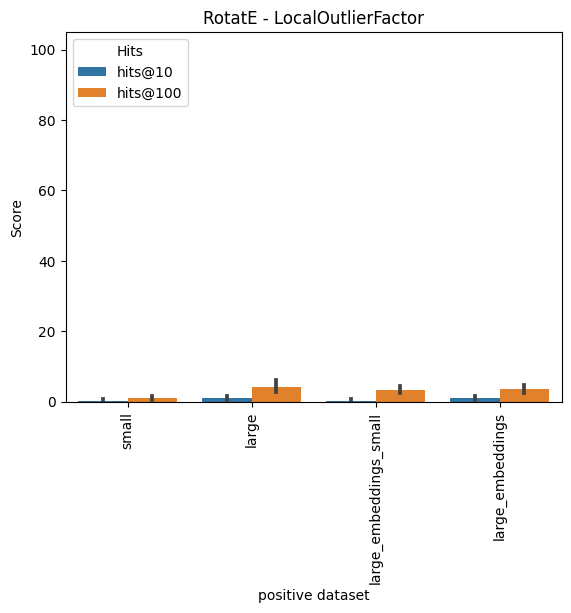

In [14]:
y_lim = (0, 105)
y_label = "Score"

import seaborn as sns
import matplotlib.pyplot as plt

model_name = "RotatE"
plot_df = plot_dfs[model_name]

plot_df["Hits"] = plot_df["variable"]
plot = sns.barplot(
    plot_df,
    x="dataset",
    y="value",
    hue="Hits",
    order=["small", "large", "large_embeddings_small", "large_embeddings"],
)
sns.move_legend(plot, "upper left")
plot.set(xlabel="positive dataset", ylabel=y_label)
plot.set_title(f"{model_name} - {method}")
plot.set_ylim(y_lim)
_ = plot.set_xticklabels(
    labels=["small", "large", "large_embeddings_small", "large_embeddings"], rotation=90
)

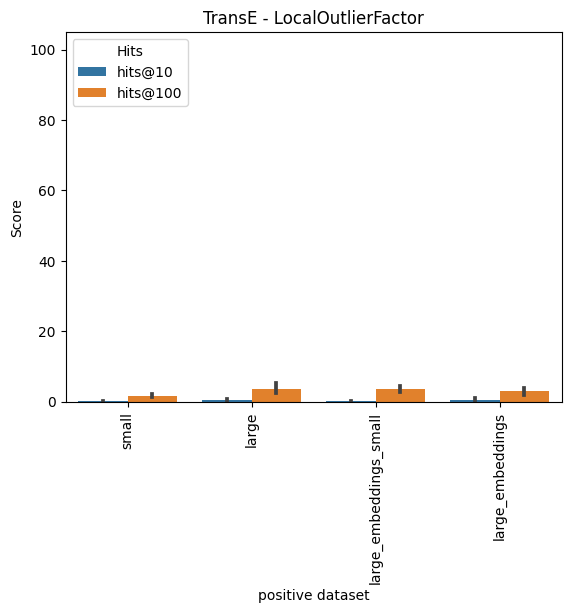

In [15]:
y_lim = (0, 105)
y_label = "Score"

import seaborn as sns
import matplotlib.pyplot as plt

model_name = "TransE"
plot_df = plot_dfs[model_name]

plot_df["Hits"] = plot_df["variable"]
plot = sns.barplot(
    plot_df,
    x="dataset",
    y="value",
    hue="Hits",
    order=["small", "large", "large_embeddings_small", "large_embeddings"],
)
sns.move_legend(plot, "upper left")
plot.set(xlabel="positive dataset", ylabel=y_label)
plot.set_title(f"{model_name} - {method}")
plot.set_ylim(y_lim)
_ = plot.set_xticklabels(
    labels=["small", "large", "large_embeddings_small", "large_embeddings"], rotation=90
)

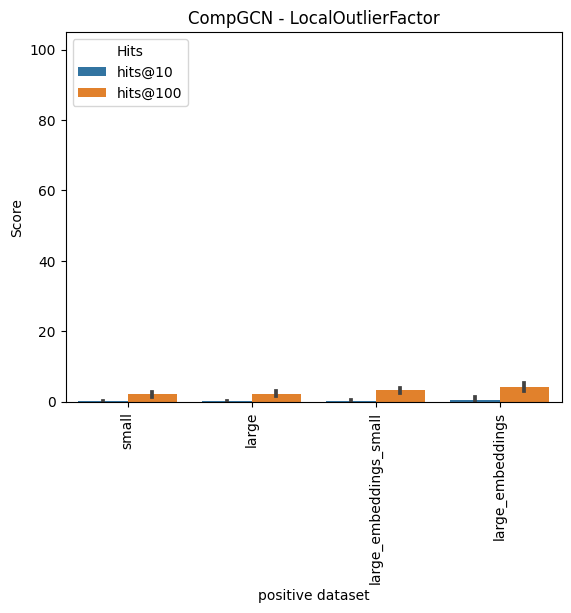

In [16]:
y_lim = (0, 105)
y_label = "Score"

import seaborn as sns
import matplotlib.pyplot as plt

model_name = "CompGCN"
plot_df = plot_dfs[model_name]

plot_df["Hits"] = plot_df["variable"]
plot = sns.barplot(
    plot_df,
    x="dataset",
    y="value",
    hue="Hits",
    order=["small", "large", "large_embeddings_small", "large_embeddings"],
)
sns.move_legend(plot, "upper left")
plot.set(xlabel="positive dataset", ylabel=y_label)
plot.set_title(f"{model_name} - {method}")
plot.set_ylim(y_lim)
_ = plot.set_xticklabels(
    labels=["small", "large", "large_embeddings_small", "large_embeddings"], rotation=90
)

In [17]:
proba_dfs = [
    build_proba_df(gs, i, mns=MODEL_NAMES)
    for gs, i in zip(grid_searches_list, input_dirs)
]
for output_dir, proba_df in zip(output_dirs, proba_dfs):
    proba_df.to_csv(output_dir / "proba_df.csv")

In [18]:
proba_df = proba_dfs[0]
proba_df.query("test").sort_values("RotatE_0", ascending=False)

,node_id,gene_name,irr,train,val,test,RotatE_0,RotatE_1,RotatE_2,RotatE_3,...,CompGCN_0,CompGCN_1,CompGCN_2,CompGCN_3,CompGCN_4,CompGCN_5,CompGCN_6,CompGCN_7,CompGCN_8,CompGCN_9
29990,Gene::7318,UBA7,False,False,False,True,1.576854e-01,-9.231758e-02,0.036837,0.006745,...,0.014543,-0.010894,-0.032563,-0.046016,-0.200756,-0.036429,0.013908,-0.066565,-0.057322,-0.145511
15162,Gene::10071,MUC12,False,False,False,True,1.490012e-01,-3.007555e-02,-0.018378,-0.045016,...,-0.619018,-0.035174,0.032616,0.027599,-0.029947,0.029618,-0.068121,0.005236,-0.067163,-0.061603
21136,Gene::26974,ZNF285,False,False,False,True,1.486958e-01,-1.871393e-01,-0.040922,0.009887,...,-0.029752,-0.028310,-0.025300,0.007363,-0.053957,0.011576,-0.008810,-0.032660,0.018579,-0.062530
22997,Gene::353514,LILRA5,False,False,False,True,1.459168e-01,-2.299213e-02,0.008167,0.020639,...,-0.024848,-0.437032,-0.174905,-0.018241,0.037245,-0.238039,0.062468,-0.301536,-0.065702,0.026019
31601,Gene::83931,STK40,False,False,False,True,1.459166e-01,-1.286658e-01,-0.004830,-0.029360,...,0.038689,0.039812,0.032856,-0.436849,-0.121249,-0.196069,-0.241129,-0.080297,-0.182263,0.055388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20514,Gene::256394,SERPINA11,False,False,False,True,-2.442894e+07,-1.233759e-01,0.031439,-0.006422,...,-0.063748,-0.068142,0.021000,-0.004480,-0.179499,-0.117545,-0.064782,0.017922,-0.292239,-0.129622
25587,Gene::5174,PDZK1,False,False,False,True,-2.488374e+07,-6.690527e+09,-0.009429,-0.331083,...,-0.048042,-0.053947,-0.343174,-0.001932,-0.091192,-0.239039,-0.148447,0.067482,-0.169196,-0.029034
20477,Gene::255725,OR52B2,False,False,False,True,-2.498188e+07,-1.094105e-01,-0.897257,0.028449,...,-0.018565,-0.100473,-0.175728,-0.121014,-0.400257,0.010875,-0.354147,-0.148095,-0.012522,-0.272979
30869,Gene::79998,ANKRD53,False,False,False,True,-2.499351e+07,-3.137164e-01,0.010609,-0.120476,...,0.029565,0.023330,-0.048730,-0.072651,-0.262744,0.004818,-0.070607,0.018718,-0.015962,-0.385500


In [19]:
for proba_df, score_df, od in zip(proba_dfs, score_dfs, output_dirs):
    proba_df.to_csv(od / "proba_df.csv")
    proba_df.query("test").to_csv(od / "proba_df_test.csv")
    score_df.to_csv(od / "score_df.csv")

    for mn in MODEL_NAMES:
        score_cols = [c for c in proba_df.columns if c.startswith(f"{mn}_")]
        tmp_df = proba_df[
            ["node_id", "gene_name", "irr", "train", "val", "test", *score_cols]
        ]
        tmp_df.to_csv(od / f"proba_df_{mn}.csv")
        tmp_df_test = tmp_df.query("test")
        tmp_df_test.to_csv(od / f"proba_df_test_{mn}.csv")

        genes_100 = build_ranked_lists(tmp_df, prefix=mn)
        genes_100.to_csv(od / f"genes_100_{mn}.csv", index=False)
        genes_100_test = build_ranked_lists(tmp_df_test, prefix=mn)
        genes_100_test.to_csv(od / f"genes_100_test_{mn}.csv", index=False)

        ds = "test"
        score_df_tmp = score_df.query("model_name == @mn")
        score_df_tmp = pd.concat(
            [score_df_tmp["m_name"], score_df_tmp.filter(regex=f".*_{ds}", axis=1)],
            axis=1,
        ).set_index("m_name")
        score_df_tmp.columns = [
            c.replace(f"_{ds}", "").replace("score", "hits@")
            for c in score_df_tmp.columns
        ]
        score_df_tmp = score_df_tmp.T
        score_df_tmp["mean"] = score_df_tmp.mean(axis=1)
        score_df_tmp.to_csv(od / f"scores_{ds}_{mn}.csv", index_label="score")

        ds = "all"
        score_df_tmp = score_df.query("model_name == @mn")
        score_df_tmp = pd.concat(
            [score_df_tmp["m_name"], score_df_tmp.filter(regex=f".*_{ds}", axis=1)],
            axis=1,
        ).set_index("m_name")
        score_df_tmp.columns = [
            c.replace(f"_{ds}", "").replace("score", "hits@")
            for c in score_df_tmp.columns
        ]
        score_df_tmp = score_df_tmp.T
        score_df_tmp["mean"] = score_df_tmp.mean(axis=1)
        score_df_tmp.to_csv(od / f"scores_{mn}.csv", index_label="score")

In [2]:
s3_prefix = "s3://ENTER AWS S3 PREFIX/Result_lists"

for model_name in MODEL_NAMES:
    method_name = f"{remote_method}_{model_name}"

    graph = "Hetionet"
    ts = "LargeTS"
    subset = "WholeSet"
    !aws s3 cp './2_outputs/standard/{local_method}/proba_df_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/standard/{local_method}/genes_100_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/standard/{local_method}/scores_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv
    subset = "TestSet"
    !aws s3 cp './2_outputs/standard/{local_method}/proba_df_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/standard/{local_method}/genes_100_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/standard/{local_method}/scores_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv

    ts = "SmallTS"
    subset = "WholeSet"
    !aws s3 cp './2_outputs/small_DS/{local_method}/proba_df_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/small_DS/{local_method}/genes_100_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/small_DS/{local_method}/scores_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv
    subset = "TestSet"
    !aws s3 cp './2_outputs/small_DS/{local_method}/proba_df_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/small_DS/{local_method}/genes_100_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/small_DS/{local_method}/scores_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv

    # Embeddings based on large DS
    graph = "enrichedHetionet"

    ts = "LargeTS"
    subset = "WholeSet"
    !aws s3 cp './2_outputs/large/{local_method}/proba_df_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/large/{local_method}/genes_100_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/large/{local_method}/scores_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv
    subset = "TestSet"
    !aws s3 cp './2_outputs/large/{local_method}/proba_df_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/large/{local_method}/genes_100_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/large/{local_method}/scores_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv

    ts = "SmallTS"
    subset = "WholeSet"
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/proba_df_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/genes_100_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/scores_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv
    subset = "TestSet"
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/proba_df_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/genes_100_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/scores_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv

upload: 2_outputs/standard/LocalOutlierFactor/proba_df_RotatE.csv to s3://nnedl-core-prd-eu-central-1-curated/compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/LocalOutlierFactor_RotatE/WholeSet/all_results.csv
upload: 2_outputs/standard/LocalOutlierFactor/genes_100_RotatE.csv to s3://nnedl-core-prd-eu-central-1-curated/compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/LocalOutlierFactor_RotatE/WholeSet/gene_100.csv
upload: 2_outputs/standard/LocalOutlierFactor/scores_RotatE.csv to s3://nnedl-core-prd-eu-central-1-curated/compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/LocalOutlierFactor_RotatE/WholeSet/scores.csv
upload: 2_outputs/standard/LocalOutlierFactor/proba_df_test_RotatE.csv to s3://nnedl-core-prd-eu-central-1-curated/compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/LocalOutlierFactor_RotatE/TestSet/all_results.csv
upload: 2_outputs/standard/Lo

In [21]:
!aws s3 ls --recursive {s3_prefix}

2023-07-05 17:45:20       6706 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/CompGCN/TestSet/100_genes.csv
2023-07-05 17:46:02       6690 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/CompGCN/WholeSet/100_genes.csv
2023-07-06 13:00:06     919155 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/Elkanoto_CompGCN/TestSet/all_results.csv
2023-07-06 13:00:08       6104 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/Elkanoto_CompGCN/TestSet/gene_100.csv
2023-07-06 13:00:10       1014 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/Elkanoto_CompGCN/TestSet/scores.csv
2023-07-06 13:00:02    4612933 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/Elkanoto_CompGCN/WholeSet/all_results.csv
2023-07-06 13:00:04       5805 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/H